**1. Install necessary packages**

In [16]:
!pip install ultralytics opencv-python-headless

ERROR: Operation cancelled by user


**2. Load YOLOv8 model: Load the pre-trained YOLOv8 model provided by Ultralytics.**

In [17]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # You can choose other versions like yolov8s.pt, yolov8m.pt, etc.


**3. Perform object recognition on an image:**


0: 384x640 2 persons, 182.5ms
Speed: 4.1ms preprocess, 182.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange'

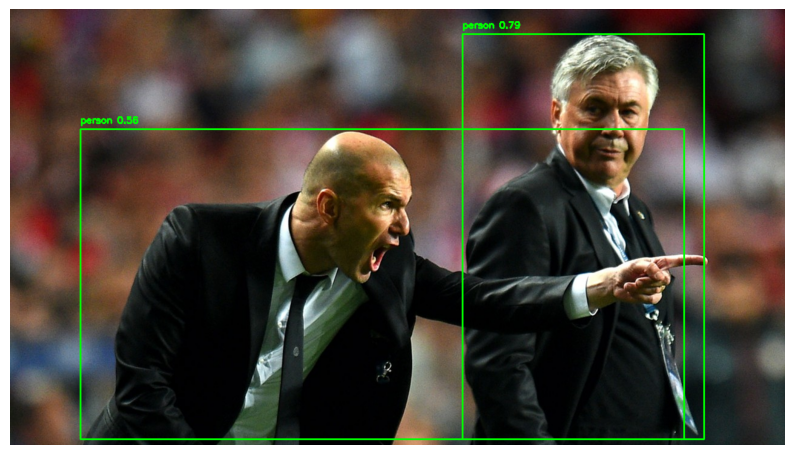

In [18]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Load an image from a URL
image_url = 'https://ultralytics.com/images/zidane.jpg'
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform object detection
results = model(image_rgb)

# Print results
print(results)

# Extract bounding boxes and labels
for result in results:
    boxes = result.boxes
    for box in boxes:
        # Draw rectangle on the image
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = model.names[int(box.cls)]
        confidence = box.conf.item()  # Convert tensor to float
        label_text = f'{label} {confidence:.2f}'
        cv2.putText(image_rgb, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


**4. Make some arragement about the image preprocessing process**


0: 384x640 2 persons, 134.2ms
Speed: 2.6ms preprocess, 134.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


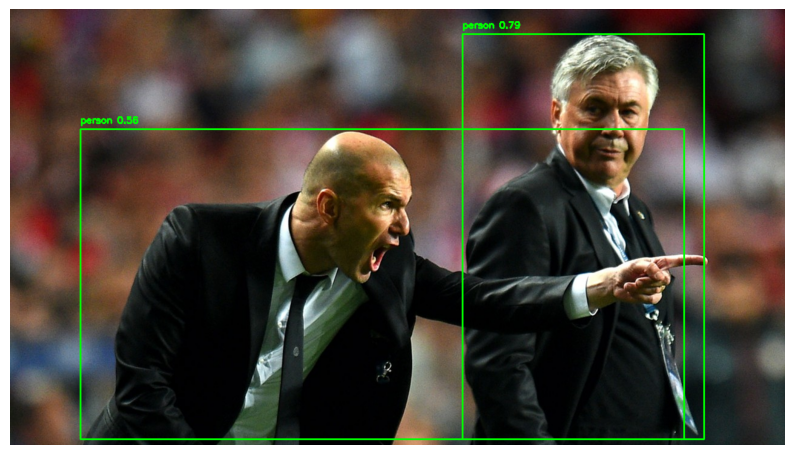

In [32]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

# Function to download and preprocess image
def load_image_from_url(image_url):
    response = requests.get(image_url)
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

# URL of the image
image_url = 'https://ultralytics.com/images/zidane.jpg'

# Load and preprocess image
image_rgb = load_image_from_url(image_url)

# Perform object detection
results = model(image_rgb)

# Draw bounding boxes and labels
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = model.names[int(box.cls)]
        confidence = box.conf.item()
        label_text = f'{label} {confidence:.2f}'

        # Draw rectangle and label
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


**5. Adjust Confidence and NMS Thresholds**

iou: Intersection Over Union Threshold for Non-Maximum Suppression - NMS


0: 384x640 3 persons, 1 tie, 214.4ms
Speed: 9.8ms preprocess, 214.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


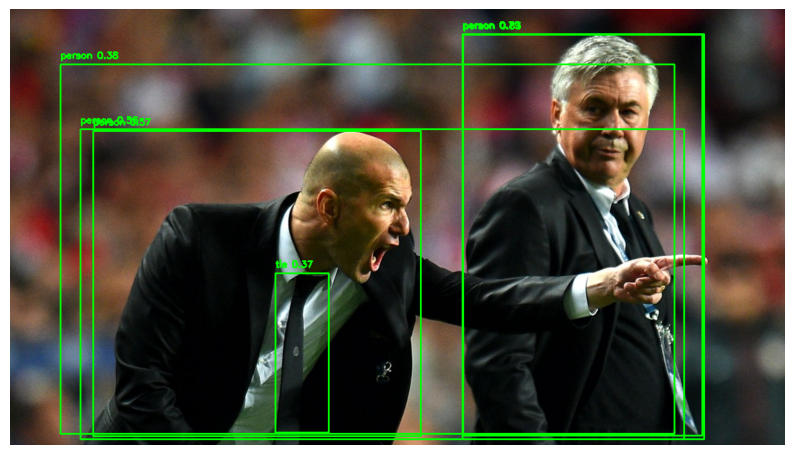

In [33]:
# Perform object detection
results2 = model(image_rgb, conf=0.25, iou=0.45)  # Adjust these values as needed

# Draw bounding boxes and labels
for result in results2:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = model.names[int(box.cls)]
        confidence = box.conf.item()
        label_text = f'{label} {confidence:.2f}'

        # Draw rectangle and label
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()